In [2]:
import pandas as pd # Tuodaan pandas-kirjasto.
import matplotlib.pyplot as plt # Tuodaan kuvioiden ja kaavioiden peruskirjasto.
# Tällä komennolla kaaviot saadaan tulostumaan automaattisesti ilman erillistä komentoa.
%matplotlib inline 

plt.style.use('seaborn-whitegrid') # Kaavioiden ulkoasun tyyli.

In [11]:
df = pd.read_csv('http://taanila.fi/sales_data_sample.csv', encoding = 'cp1252')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [24]:
# Tehdään taulukko, josta nähdään kauppojen eri kokojen määrät vuosineljänneksittäin.
# Listataan muuttujien arvot.
QTR_ID = ['Q1', 'Q2', 'Q3', 'Q4']
DEALSIZE = ['Small', 'Medium', 'Large']

In [25]:
df1 = pd.crosstab(df['QTR_ID'], df['DEALSIZE']) # Tehdään ristiintaulukointi.

df1.index = QTR_ID # Lisätään otsikot.
df1.columns = DEALSIZE

df1

,Small,Medium,Large
Q1,32,338,295
Q2,47,260,254
Q3,26,237,240
Q4,52,549,493


In [42]:
# Tehdään taulukko, jossa on edellisen taulukon tiedot prosentteina.
df2 = pd.crosstab(df['QTR_ID'], df['DEALSIZE'], normalize = 'columns')

df2.index = QTR_ID # Lisätään riviotsikot.

# En jostain syystä saanut n-arvoja näkymään oikein.
pienet = df['QTR_ID'][df['DEALSIZE']==1].count()
keskikokoiset = df['QTR_ID'][df['DEALSIZE']==2].count()
suuret = df['QTR_ID'][df['DEALSIZE']==3].count()
df2.columns = ['Small, n=' + str(pienet), 'Medium, n=' + str(keskikokoiset), 'Large, n=' + str(suuret)]

(df2*100).style.format('{:.1f} %') # Viimeisttellään prosenttilukujen ulkoasu.

,"Small, n=0","Medium, n=0","Large, n=0"
Q1,20.4 %,24.4 %,23.0 %
Q2,29.9 %,18.8 %,19.8 %
Q3,16.6 %,17.1 %,18.7 %
Q4,33.1 %,39.7 %,38.5 %


[Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '25 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '35 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '45 %')]

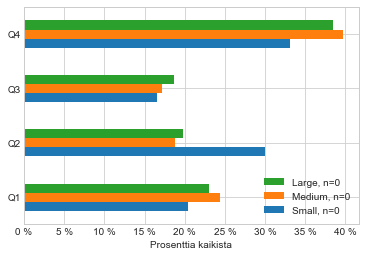

In [34]:
ax1 = df2.plot.barh(legend='reverse') # Tehdään edellisestä pylväskuvio.

ax1.set_xlabel('Prosenttia kaikista') # X-akselin nimi.

ax1.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax1.get_xticks()]) # Viimeisttellään prosenttilukujen ulkoasu.

[Text(0, 0, '0 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '80 %'),
 Text(0, 0, '100 %'),
 Text(0, 0, '120 %')]

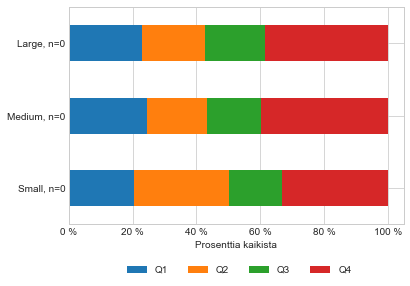

In [46]:
ax2 = df2.T.plot.barh(stacked = True) # Sama pinottuina pylväinä.

ax2.set_xlabel('Prosenttia kaikista') # X-akselin nimi.

ax2.legend(loc=(0.16, -0.25), ncol=4) # Nimen sijoittaminen keskelle kokeilemalla.
 
ax2.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax2.get_xticks()]) # Viimeisttellään prosenttilukujen ulkoasu.

In [40]:
# Tehdään khiin neliö -testi, josta saadaan muuttujien riippuvuudesta kertova p-arvo.
# P-arvo on alle 0,05, joten tulos on tilastollisesti merkitsevä.
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df['QTR_ID'], df['DEALSIZE']))

(12.811966019594855,
 0.04612104098188777,
 6,
 array([[ 36.98370528, 326.02196245, 301.99433227],
        [ 31.19978746, 275.03506908, 254.76514346],
        [ 27.97414098, 246.60007085, 228.42578817],
        [ 60.84236628, 536.34289763, 496.8147361 ]]))